# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [1]:
# Done: Make all necessary imports.
import numpy as np
import tensorflow as tf
# Set the seed for NumPy
np.random.seed(42)
# Set the seed for TensorFlow
tf.random.set_seed(42)

import os, glob
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical


import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

2024-08-20 17:57:45.507881: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 17:57:45.507970: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 17:57:45.508036: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [2]:
# done: Load the dataset with TensorFlow Datasets.

import tensorflow_datasets as tfds

# Load the "oxford_flowers102" dataset
dataset, info = tfds.load("oxford_flowers102", with_info=True, as_supervised=True)

# done: Create a training set, a validation set and a test set.

train_dataset,validation_dataset, test_dataset = dataset['train'],dataset['validation'],dataset['test']

2024-08-20 17:57:48.917116: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: UNKNOWN ERROR (34)


In [3]:


def preprocess_image(image, label):
    # Resize to 224x224 pixels
    image = tf.image.resize(image, [224, 224])
    # Normalize to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply the preprocessing to each dataset
train_dataset = train_dataset.map(preprocess_image)
validation_dataset = validation_dataset.map(preprocess_image)
test_dataset = test_dataset.map(preprocess_image)

# Optionally, you can batch the dataset for training
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
validation_dataset = validation_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Print dataset info
print(info)

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

## Explore the Dataset

In [4]:
# TODO: Get the number of examples in each set from the dataset info.
num_train_examples = info.splits['train'].num_examples
num_validation_examples = info.splits['validation'].num_examples
num_test_examples = info.splits['test'].num_examples

print(f"Number of training examples: {num_train_examples}")
print(f"Number of validation examples: {num_validation_examples}")
print(f"Number of test examples: {num_test_examples}")

# TODO: Get the number of classes in the dataset from the dataset info.

# Get the number of classes in the dataset from the dataset info
num_classes = info.features['label'].num_classes

print(f"Number of classes: {num_classes}")

Number of training examples: 1020
Number of validation examples: 1020
Number of test examples: 6149
Number of classes: 102


In [5]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for image, label in train_dataset.take(3):  # Take 3 examples from the dataset
    print(f"Image shape: {image.shape}, Label: {label.numpy()}")

Image shape: (32, 224, 224, 3), Label: [ 72  84  70  51  48  83  42  58  40  35  40  60  59  95  87  23  91  70
  75  87  58  79  24  20  64  89  40 100  62  95  16  84]
Image shape: (32, 224, 224, 3), Label: [ 2 41 26 89 45 67  1 61  2 54 39  2  7 12 72 29 11 11 42 26 43 98 63 87
 75 75 89 15 55 38 36 78]
Image shape: (32, 224, 224, 3), Label: [ 3 23 70 79 30 95 57 73 25 20  5 53 90 55 23  0 92  9 16 68 63  9 61 43
  8 28 12 50 25 55 22 96]


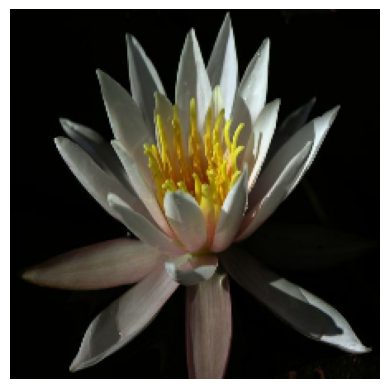

In [6]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
def plot_one_image_from_batch(dataset):
    for images, labels in dataset.take(1):
        image = images[0].numpy()
        label = labels[0].numpy()
        
        plt.imshow(image)
        plt.axis('off') 
        plt.show()

plot_one_image_from_batch(train_dataset)

In [7]:
import tensorflow as tf

#Ensure the dataset is unbatched to work with individual images
unbatched_dataset = train_dataset.unbatch()

#Take and print the shape and label of the first 3 images
for image, label in unbatched_dataset.take(3):
    print(f"Image shape: {image.shape}, Label: {label.numpy()}")

Image shape: (224, 224, 3), Label: 72
Image shape: (224, 224, 3), Label: 84
Image shape: (224, 224, 3), Label: 70


Image shape: (224, 224, 3), Label: 72
Image shape: (224, 224, 3), Label: 84
Image shape: (224, 224, 3), Label: 70


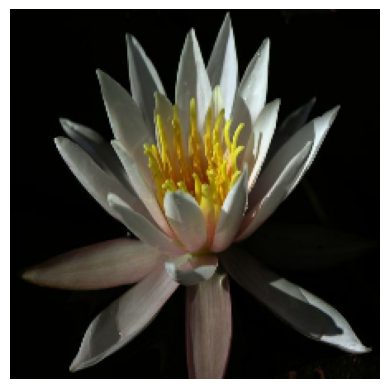

In [8]:
import tensorflow as tf

#Ensure the dataset is unbatched to work with individual images
unbatched_dataset = train_dataset.unbatch()

#Take and print the shape and label of the first 3 images
for image, label in unbatched_dataset.take(3):
    print(f"Image shape: {image.shape}, Label: {label.numpy()}")
#TODO: Plot 1 image from the training set. Set the title
#of the plot to the corresponding image label.
def plot_one_image_from_batch(dataset):
    for images, labels in dataset.take(1):
        image = images[0].numpy()
        label = labels[0].numpy()

        plt.imshow(image)
        plt.axis('off') 
        plt.show()

plot_one_image_from_batch(train_dataset)

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [9]:
import json

with open('label_map.json', 'r') as f:
    class_names = json.load(f)

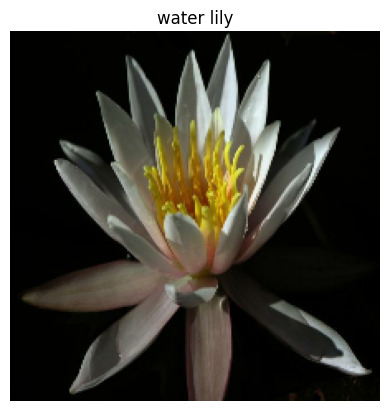

In [10]:
def plot_one_image_from_batch(dataset):
    for images, labels in dataset.take(1):
        image = images[0].numpy()
        label = labels[0].numpy()
        
        class_name = class_names.get(str(label), 'Unknown')
        
        plt.imshow(image)
        plt.title(class_name)  # Set the title to the class name
        plt.axis('off')  # Hide axis
        plt.show()

# Plot one image from the training dataset
plot_one_image_from_batch(train_dataset)


## Create Pipeline

In [11]:
batch_size

32

In [12]:
# done: Create a pipeline for each set.


train_pipeline = (train_dataset
                  .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
                  .unbatch()  
                  .batch(batch_size)
                  .prefetch(buffer_size=tf.data.AUTOTUNE))

validation_pipeline = (validation_dataset
                       .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
                       .unbatch()  
                       .batch(batch_size)
                       .prefetch(buffer_size=tf.data.AUTOTUNE))

test_pipeline = (test_dataset
                 .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
                 .unbatch()  
                 .batch(batch_size)
                 .prefetch(buffer_size=tf.data.AUTOTUNE))

In [13]:
test_pipeline

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [14]:
# Done: Build and train your network.
import tensorflow_hub as hub

# Load the MobileNet model from TensorFlow Hub
mobilenet_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(mobilenet_url, input_shape=(224, 224, 3), trainable=False)

# Build the model
model = tf.keras.Sequential([
    feature_extractor,  # Output shape is (None, 1280)
    
    # Add hidden (dense) layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(102, activation='softmax')  # 102 classes for the flowers
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_pipeline,
    validation_data=validation_pipeline,
    epochs=10  
)

Epoch 1/10
32/32 [==============================] - 111s 3s/step - loss: 4.8408 - accuracy: 0.0059 - val_loss: 4.6329 - val_accuracy: 0.0098
Epoch 2/10
32/32 [==============================] - 117s 4s/step - loss: 4.6630 - accuracy: 0.0147 - val_loss: 4.6252 - val_accuracy: 0.0078
Epoch 3/10
32/32 [==============================] - 126s 4s/step - loss: 4.6311 - accuracy: 0.0078 - val_loss: 4.6250 - val_accuracy: 0.0098
Epoch 4/10
32/32 [==============================] - 130s 4s/step - loss: 4.6255 - accuracy: 0.0069 - val_loss: 4.6250 - val_accuracy: 0.0098
Epoch 5/10
32/32 [==============================] - 134s 4s/step - loss: 4.6255 - accuracy: 0.0059 - val_loss: 4.6250 - val_accuracy: 0.0098
Epoch 6/10
32/32 [==============================] - 121s 4s/step - loss: 4.6254 - accuracy: 0.0078 - val_loss: 4.6250 - val_accuracy: 0.0098
Epoch 7/10
32/32 [==============================] - 123s 4s/step - loss: 4.6255 - accuracy: 0.0088 - val_loss: 4.6250 - val_accuracy: 0.0098
Epoch 8/10
32

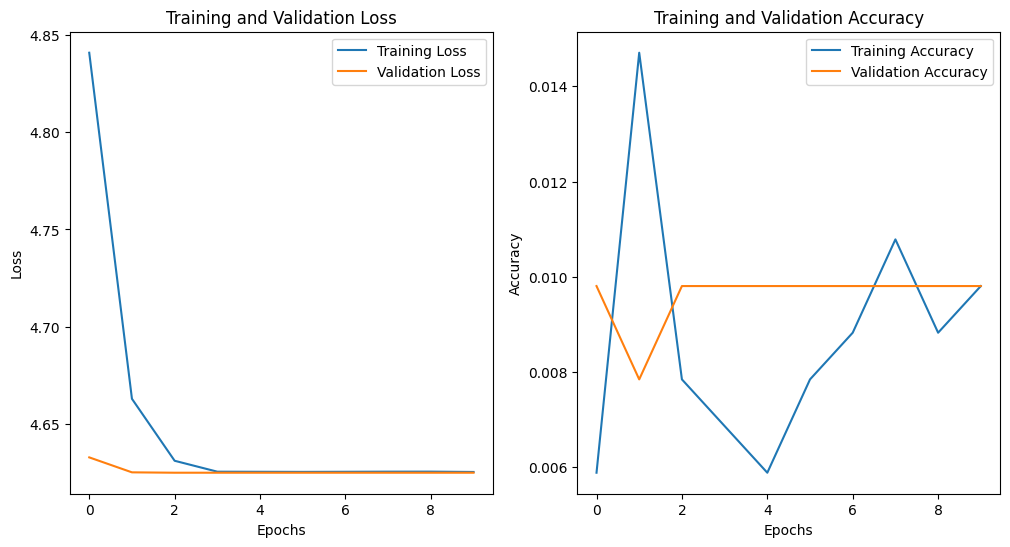

In [15]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.

# Plotting the loss
plt.figure(figsize=(12, 6))

# Training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [16]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

test_loss, test_accuracy = model.evaluate(test_pipeline)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

193/193 [==============================] - 362s 2s/step - loss: 4.6263 - accuracy: 0.0037
Test Loss: 4.626290321350098
Test Accuracy: 0.0037404457107186317


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [17]:
# TODO: Save your trained model as a Keras model.


model.save('flower_classifier_model.h5')

## Load the Keras Model

Load the Keras model you saved above.

In [18]:
# TODO: Load the Keras model
from tensorflow.keras.layers import Layer
import tensorflow_hub as hub
import tensorflow as tf

class KerasLayer(Layer):
    def __init__(self, handle, **kwargs):
        super(KerasLayer, self).__init__(**kwargs)
        self.handle = handle
        self.tf_hub_module = hub.KerasLayer(handle, trainable=False)
        
    def call(self, inputs):
        return self.tf_hub_module(inputs)

from tensorflow.keras.utils import custom_object_scope
from tensorflow.keras.models import load_model

# Load the model with the custom object scope
with custom_object_scope({'KerasLayer': KerasLayer}):
    model = load_model('flower_classifier_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 102)               26214     
                                                                 
Total params: 3071398 (11.72 MB)
Trainable params: 81341

"\nWhen you encounter the ValueError: Unknown layer: 'KerasLayer' error,\n it usually means that the model you are trying to load includes custom layers or objects that are not part of the standard Keras library.\n In such cases, you need to take additional steps to handle these custom components properly.\n \n "

# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [19]:
# TODO: Create the process_image function


def process_image(image_path):
    # Read the image file
    image = tf.io.read_file(image_path)
    
    # Decode the image as a JPEG file, this will give you a tensor of shape (height, width, channels)
    image = tf.image.decode_jpeg(image, channels=3)
    
    # Resize the image to 224x224 pixels as required by most CNN models
    image = tf.image.resize(image, [224, 224])
    
    # Normalize the pixel values to the range [0, 1]
    image = image / 255.0
    
    # Add a batch dimension, since the model expects batches of images
    image = tf.expand_dims(image, axis=0)
    return image


To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

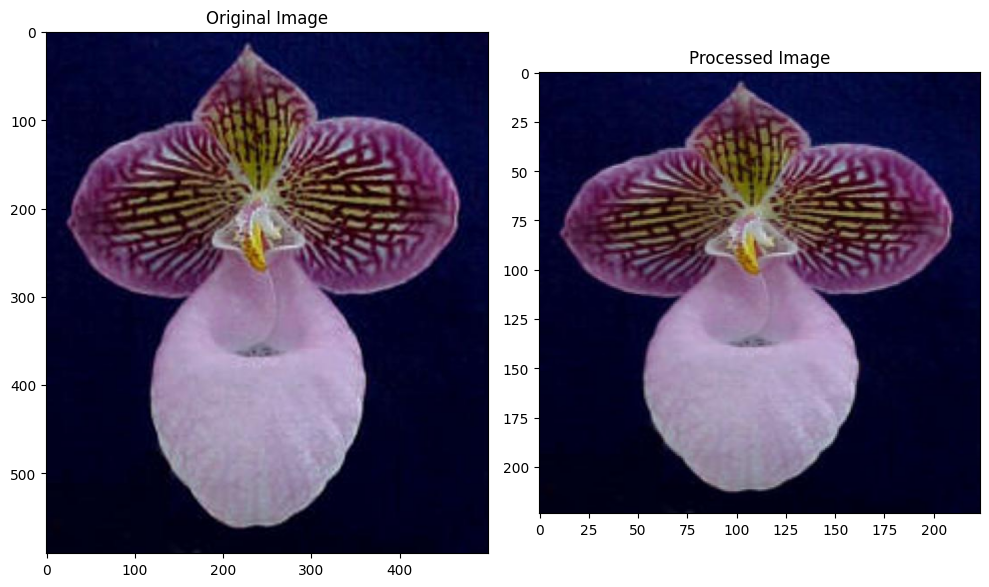

In [23]:
from PIL import Image

def process_image(image_array):
 
    
    # Convert the NumPy array to a TensorFlow tensor
    image = tf.convert_to_tensor(image_array, dtype=tf.float32)
    
    # Resize the image to the desired size (e.g., 224x224)
    image = tf.image.resize(image, [224, 224])
    
    # Normalize the image (e.g., scale pixel values to [0, 1])
    image /= 255.0
    
    return image.numpy()  # Return as a NumPy array for further processing

# Example usage
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and process the image
image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

# Process the image using the modified function
processed_test_image = process_image(test_image)

# Plot the original and processed images
fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()


# Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [33]:
def predict(image_path, model, top_k=5):
  
    # Process the image (assuming process_image function exists)
    processed_image = process_image(image_path)
    
    # Make a prediction
    predictions = model.predict(processed_image)
    
    # Get the top K predictions
    probs = np.sort(predictions[0])[-top_k:][::-1]  # Sort in descending order
    class_indices = np.argsort(predictions[0])[-top_k:][::-1]
    
    return probs, class_indices

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 0s 37ms/step


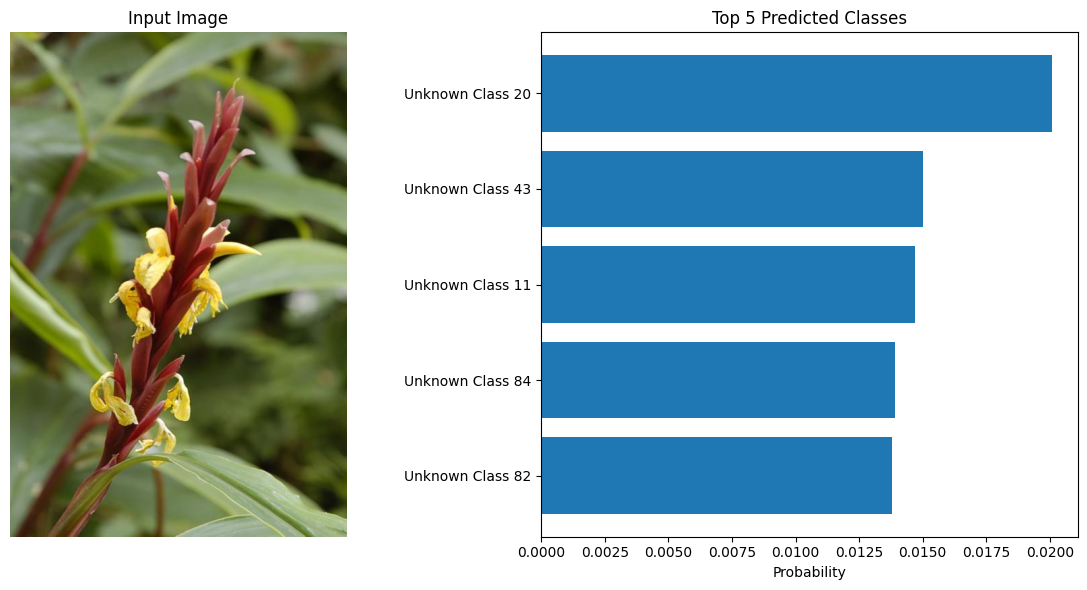

In [35]:
def plot_prediction(image_path, model, class_names, top_k=5):
 
    # Predict
    probs, class_indices = predict(image_path, model, top_k)
    
    # Convert class indices to class names
    top_k_classes = [class_names.get(idx, f"Unknown Class {idx}") for idx in class_indices]
    
    # Load the image for plotting
    image = Image.open(image_path)
    
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the image
    ax1.imshow(image)
    ax1.axis('off')
    ax1.set_title('Input Image')
    
    # Plot the bar graph for probabilities
    ax2.barh(top_k_classes, probs)
    ax2.set_xlabel('Probability')
    ax2.set_title('Top 5 Predicted Classes')
    ax2.invert_yaxis()  # Highest probability on top
    
    plt.tight_layout()
    plt.show()

# Example usage
class_names = {
    0: 'cautleya_spicata',
    1: 'hard-leaved_pocket_orchid',
    2: 'orange_dahlia',
    3: 'wild_pansy'
    # Add other class names as needed
}

# Replace 'path/to/image.jpg' and 'model' with your actual image path and model
plot_prediction('test_images/cautleya_spicata.jpg', model, class_names, top_k=5)
